In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

from sklearn.linear_model import RidgeClassifierCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [9]:
DATA_FOLDER = '../../data/csv/'
DATA_FILE1 = '10101.smo.csv'


In [10]:
file1 = DATA_FOLDER + DATA_FILE1
df = pd.read_csv(file1)


# Predict with same Mouse

In [11]:
df = helpers.drop_invalid_features(df, max_invalid_ratio=0.5)
df = helpers.log_features(df, ignored=['state'])
df = helpers.standardize(df, ignored=['state'])
# df = helpers.expand_features_poly(df, max_degree=3, ignored=['state', 'bias'])
# df = helpers.expand_features_trigonometric(df, columns=['EEGv', 'EMGv'])

X = df.drop(['state'], axis=1)
y = df['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

df.head()


AttributeError: module 'helpers' has no attribute 'drop_invalid_features'

Text(0, 0.5, 'EMGv')

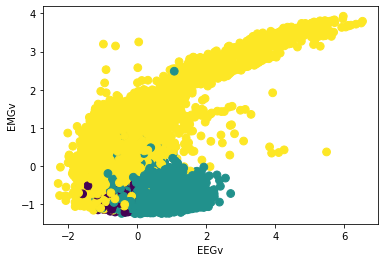

In [ ]:
plt.figure()
plt.scatter(X_test['EEGv'], X_test['EMGv'], c=y_test, s=60)
plt.xlabel('EEGv')
plt.ylabel('EMGv')

## Ridge Regression

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


0.9134722222222222


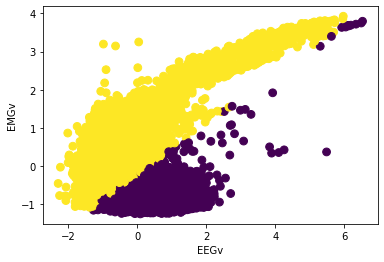

In [ ]:

alphas=[1e-3, 1e-2, 1e-1, 1]

clf = RidgeClassifierCV(alphas=alphas).fit(X_train, y_train)

plt.figure()
plt.scatter(X_test['EEGv'], X_test['EMGv'], c=clf.predict(X_test), s=60)
plt.xlabel('EEGv')
plt.ylabel('EMGv')

print(clf.score(X_test, y_test))

## Logic Regression

0.9175462962962962


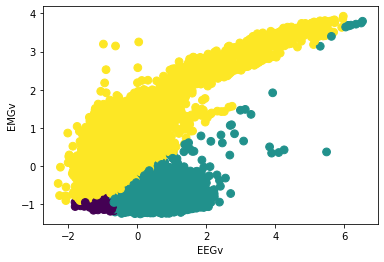

In [ ]:

lgf = LogisticRegression(random_state=0).fit(X_train, y_train)
plt.figure()
plt.scatter(X_test['EEGv'], X_test['EMGv'], c=lgf.predict(X_test), s=60)
plt.xlabel('EEGv')
plt.ylabel('EMGv')

print(lgf.score(X_test, y_test))

## K Nearest Neihbors

0.9175462962962962


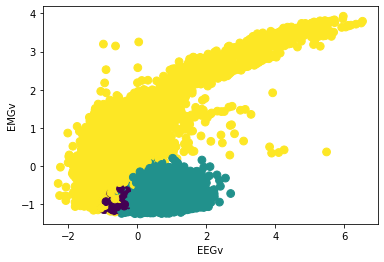

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)

plt.figure()
plt.scatter(X_test['EEGv'], X_test['EMGv'], c=knn.predict(X_test), s=60)
plt.xlabel('EEGv')
plt.ylabel('EMGv')
print(accuracy)

# Predicting state with another mouse 


In [ ]:
DATA_FILE2 = '10306.csv'
file2 = DATA_FOLDER + DATA_FILE2
df2 = pd.read_csv(file2)

df2 = helpers.drop_invalid_features(df2, max_invalid_ratio=0.5)
df2 = helpers.log_features(df2, ignored=['state'])
df2 = helpers.standardize(df2, ignored=['state'])
# df2 = helpers.expand_features_poly(df2, max_degree=3, ignored=['state', 'bias'])
# df2 = helpers.expand_features_trigonometric(df2, columns=['EEGv', 'EMGv'])

X_new = df2.drop(['state'], axis=1)
y_new = df2['state']

df2.head()


hello world


,state,EEGv,EMGv
0,2,0.082075,-0.876777
1,2,0.304032,-0.933312
2,2,0.377236,-0.903323
3,2,-0.187657,-1.038147
4,1,-0.403383,-1.079313


## The labeled mouse

Text(0, 0.5, 'EMGv')

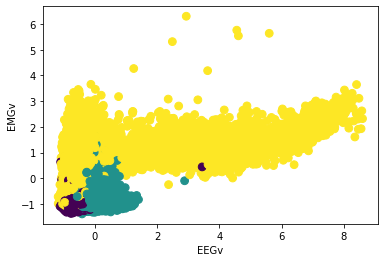

In [ ]:
plt.figure()
plt.scatter(X_new['EEGv'], X_new['EMGv'], c=y_new, s=60)
plt.xlabel('EEGv')
plt.ylabel('EMGv')

## The predicted mouse

## Ridge Regression

0.8764120370370371


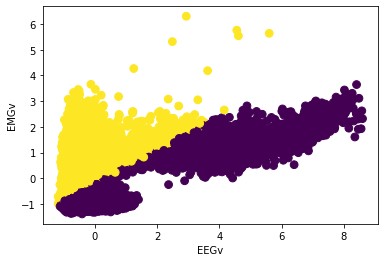

In [ ]:

plt.figure()
plt.scatter(X_new['EEGv'], X_new['EMGv'], c=clf.predict(X_new), s=60)
plt.xlabel('EEGv')
plt.ylabel('EMGv')

print(clf.score(X_new, y_new))

## Logic Regression

0.8831828703703704


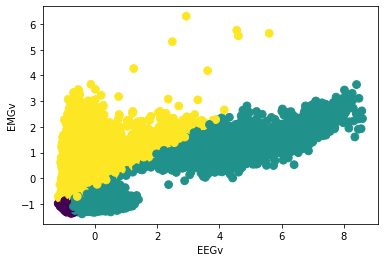

In [ ]:
plt.figure()
plt.scatter(X_new['EEGv'], X_new['EMGv'], c=lgf.predict(X_new), s=60)
plt.xlabel('EEGv')
plt.ylabel('EMGv')

print(lgf.score(X_new, y_new))

## KNN

0.9220023148148148


Text(0, 0.5, 'EMGv')

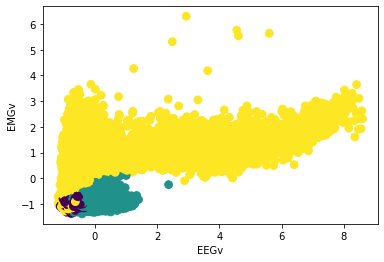

In [ ]:
accuracy = knn.score(X_new, y_new)
print(accuracy)
plt.figure()
plt.scatter(X_new['EEGv'], X_new['EMGv'], c=knn.predict(X_new), s=60)
plt.xlabel('EEGv')
plt.ylabel('EMGv')


In [ ]:
def k_fold_cross_validation(X, y, model, k, seed):
    """
    Perform k-fold cross validation on the data (doesn't work on Sequential neural networks).
    Args:
        X: features
        y: labels
        model: model to use
        k: number of folds
        seed: seed for the random generator
    """

    # Variables for average classification report
    originalclass = []
    predictedclass = []

    # Make our customer score
    def classification_report_with_accuracy_score(y_true, y_pred):
        originalclass.extend(y_true)
        predictedclass.extend(y_pred)
        return accuracy_score(y_true, y_pred) # return accuracy score

    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)

    nested_score = cross_val_score(model, X=X, y=y, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))
    return classification_report(originalclass, predictedclass)

In [ ]:
def k_fold_cross_validation(x, y, model, k, seed):
    """
    Perform k-fold cross validation on the data (Works on Sequential neural networks).
    Args:
        x: features
        y: labels
        model: model to use
        k: number of folds
        seed: seed for the random generator
    """
    x, y, le = features.split_encode_scale_data_kfold(df, useRaw, seed, cat_matrix=True)
    model = baseline_model(x_train.shape[1], le.classes_.size)

    kfold = KFold(n_splits=5, shuffle=True)

    # K-fold Cross Validation model evaluation
    fold_no = 1
    for train, test in kfold.split(x, y):
    model = baseline_model(x_train.shape[1], le.classes_.size)
    # Generate a print
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(x=x[train],
                        y=y[train],
                        epochs=300,
                        batch_size=64,
                        verbose=0,
                    )

    # confusion matrix
    cm = np.zeros((le.classes_.size, le.classes_.size))
    cm = cm + plots.confusion(model=model, x_test=x[test], y_test=y[test], le=le, cat_matrix=True)
    # Increase fold number
    fold_no = fold_no + 1

    confusion = pd.DataFrame(cm, index=le.classes_, columns=le.classes_ + ' (pred)')
    sns.heatmap(confusion, annot=True, cmap="Blues", fmt='.2f')
    plt.title(f'Confusion matrix (normalize = true')
    plt.show()